<a href="https://colab.research.google.com/github/mromar2022/Abdo_Omar_1820413_MV_Midterm/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Assignment 1
---


Name : Abdo Omar akram Omar Abdo 



---


Matric NO.: 1820413


**A**

In [4]:
import cv2 #opencv
import matplotlib.pyplot as plt
import time
import os

In [5]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

In [11]:
def take_photo(filename='Angry_Face.jpg', quality=1.0):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

As shown above, we can change the highlighted string (which in my case is "Angry") three times for each different expression. The picture will be saved automatically in our google drive 



<IPython.core.display.Javascript object>

Saved to Angry_Face.jpg


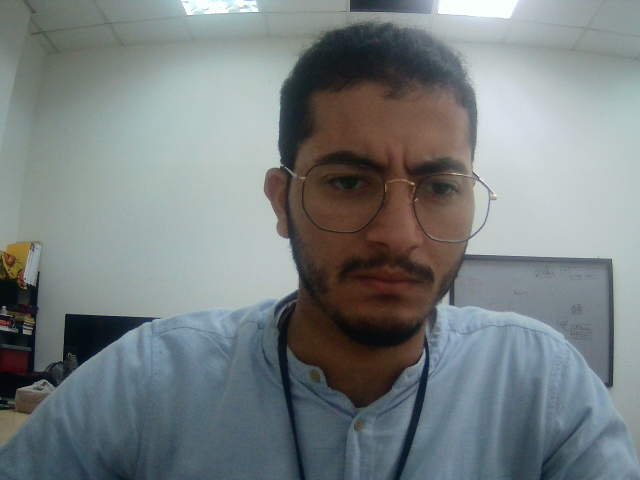

In [12]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  display(Image(filename))
except Exception as err:
  print(str(err))

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from PIL import Image
%matplotlib inline
drive.mount('/content/gdrive')
path = "/content"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


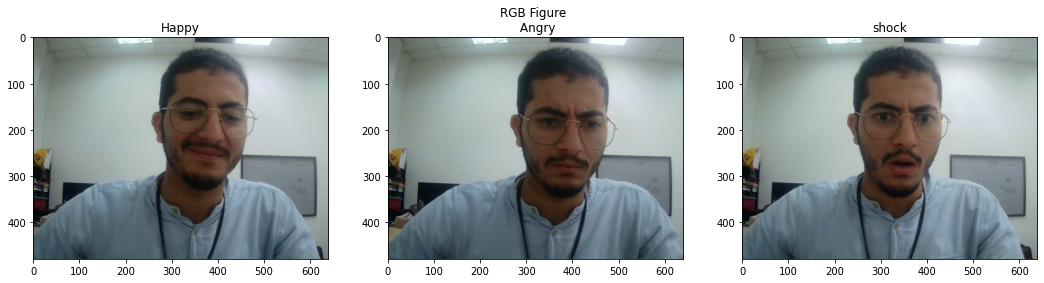

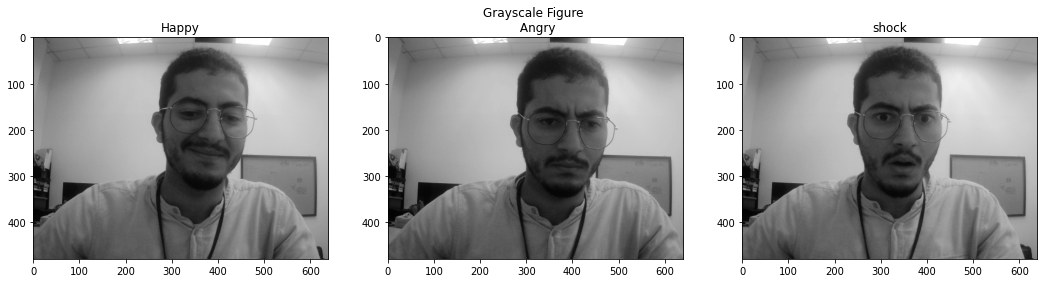

In [14]:
#opening image using openCV2
#for happy expression
img_happy_bgr = cv2.imread(path +"/Happy_Face.jpg",cv2.IMREAD_COLOR)
img_happy_rgb = cv2.cvtColor(img_happy_bgr, cv2.COLOR_BGR2RGB)
happy_gray = cv2.cvtColor(img_happy_rgb, cv2.COLOR_RGB2GRAY)
#for angry expression
img_angry_bgr = cv2.imread(path +"/Angry_Face.jpg",cv2.IMREAD_COLOR)
img_angry_rgb = cv2.cvtColor(img_angry_bgr, cv2.COLOR_BGR2RGB)
angry_gray = cv2.cvtColor(img_angry_rgb, cv2.COLOR_RGB2GRAY)
#for shock expression
img_shock_bgr = cv2.imread(path +"/Shock_Face.jpg",cv2.IMREAD_COLOR)
img_shock_rgb = cv2.cvtColor(img_shock_bgr, cv2.COLOR_BGR2RGB)
shock_gray = cv2.cvtColor(img_shock_rgb, cv2.COLOR_RGB2GRAY)

#Showing all image expression
def plot_expression_rgb():
  plt.figure(figsize=[18,5])
  plt.subplot(131);plt.imshow(img_happy_rgb);plt.title("Happy");
  plt.subplot(132);plt.imshow(img_angry_rgb);plt.title("RGB Figure \n Angry");
  plt.subplot(133);plt.imshow(img_shock_rgb);plt.title("shock");

def plot_expression_gray():
  plt.figure(figsize=[18,5])
  plt.subplot(131);plt.imshow(happy_gray, cmap='gray');plt.title("Happy");
  plt.subplot(132);plt.imshow(angry_gray, cmap='gray');plt.title("Grayscale Figure \n Angry");
  plt.subplot(133);plt.imshow(shock_gray, cmap='gray');plt.title("shock");

plot_expression_rgb()
plot_expression_gray()

For the codes shown we first use cv2.imread to obtain the picture from our
google drive. Then we use cv2.IMREAD_COLOR to read the picture in BGR mode. As the picture is in BGR mode, we will need to convert the picture by using cv2.cvtColor and choose whether to convert the picture into RGB or Grayscale picture.
Since google colab cannot use cv2.imshow to show an image, we can use matplotlib to plot our picture by using plt.imshow as shown below.

In [15]:
#def face_detection(fileName, expression):
face_cascade = cv2.CascadeClassifier("/content/gdrive/MyDrive/MV/assignment1/haarcascade_frontalface_alt.xml")
face1 = face_cascade.detectMultiScale(img_happy_rgb, 1.1 , 4)
face2 = face_cascade.detectMultiScale(img_angry_rgb, 1.1 , 4)
face3 = face_cascade.detectMultiScale(img_shock_rgb, 1.1 , 4)

for(x, y, w, h) in face1:
  cv2.rectangle(img_happy_rgb, (x, y), (x + w, y + h), (255, 0, 0), 3)
  #crop image
  happy_rgb = img_happy_rgb[y:y + h, x:x +w]
  happy = cv2.cvtColor(happy_rgb, cv2.COLOR_RGB2GRAY)

for(x, y, w, h) in face2:
  cv2.rectangle(img_angry_rgb, (x, y), (x + w, y + h), (255, 0, 0), 3)
  angry_rgb = img_angry_rgb[y:y + h, x:x +w]
  angry = cv2.cvtColor(angry_rgb, cv2.COLOR_RGB2GRAY)

for(x, y, w, h) in face3:
  cv2.rectangle(img_shock_rgb, (x, y), (x + w, y + h), (255, 0, 0), 3)
  shock_rgb = img_shock_rgb[y:y + h, x:x +w]
  shock = cv2.cvtColor(shock_rgb, cv2.COLOR_RGB2GRAY)

 we are initializing a Cascade Classifier. The"haarcascade_frontalface _alt.xm|" is a specification for which pretrained model is used for this assignment. For facel, face2 and face3, this is where the detection happens and the parameters here are very important For the first parameter which is scale factor with a value of 1.1, what it means here is that I am using a small step for resizing where I resize the picture by 10% so that the chance of a matching size with the model for detection will be increased. Then, the value 4 is the parameter specifying how many neighbors each candidate rectangle should have to retain it. This parameter will affect the quality of the detected faces where higher value results in fewer detections but with higher quality

 x, y are pixel location of faces, w, h are width and height of faces.
We use cv2.rectangle) function to draw a rectangle over the detected object image. (x,y),(xtw, y+h) are the location of the rectangle. Then we crop the image inside the rectangle and convert the cropped image to a grayscale picture. The output of the face detection and cropped picture are shown

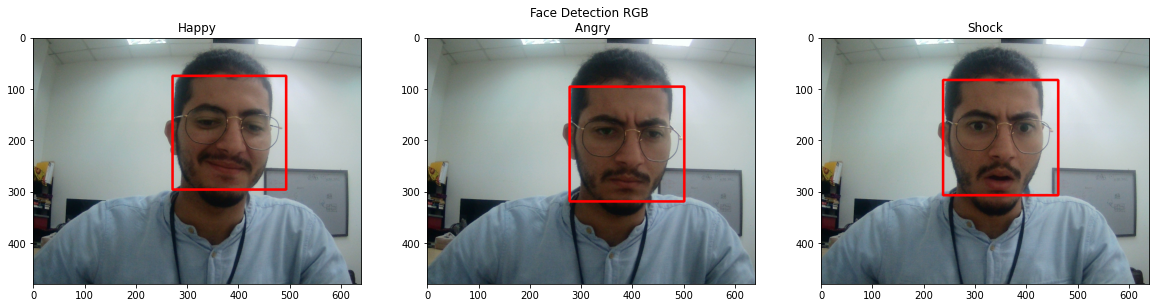

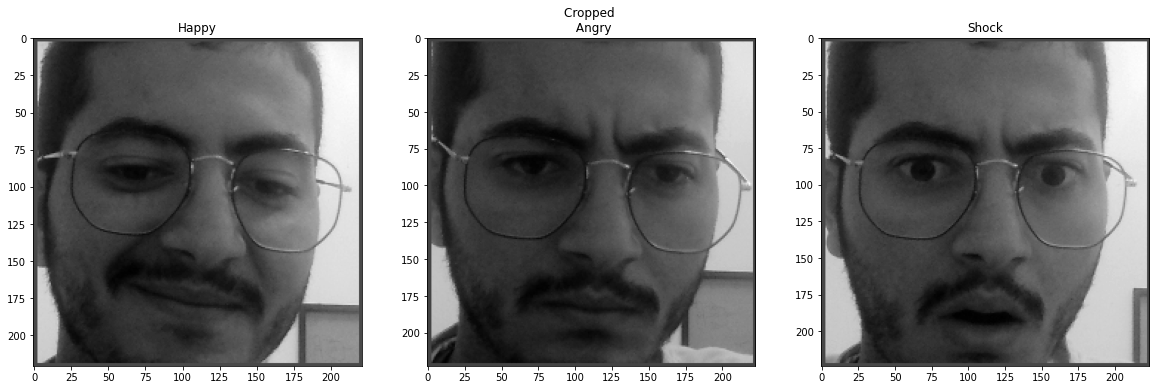

In [16]:
plt.figure(figsize=[20,10])
plt.subplot(131);plt.imshow(img_happy_rgb);plt.title("Happy");
plt.subplot(132);plt.imshow(img_angry_rgb);plt.title("Face Detection RGB \n Angry");
plt.subplot(133);plt.imshow(img_shock_rgb);plt.title("Shock");

plt.figure(figsize=[20,10])
plt.subplot(131);plt.imshow(happy, cmap='gray');plt.title("Happy");
plt.subplot(132);plt.imshow(angry, cmap='gray');plt.title("Cropped \n Angry");
plt.subplot(133);plt.imshow(shock, cmap='gray');plt.title("Shock");

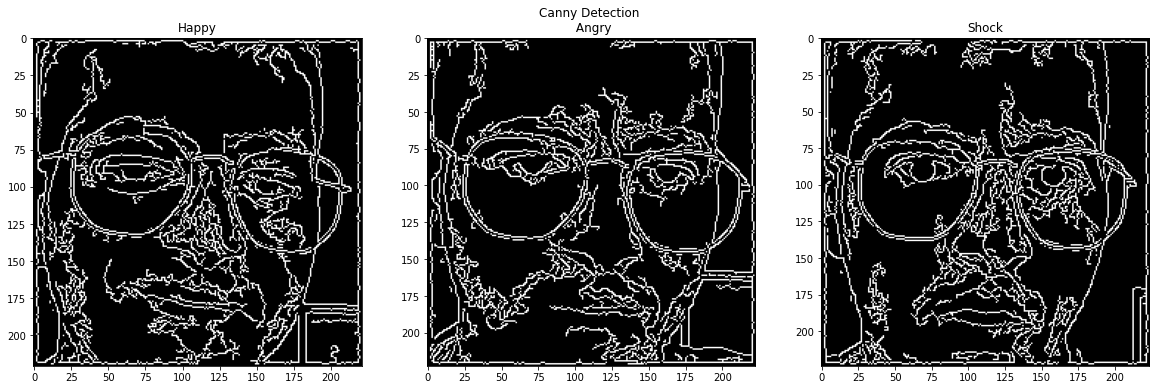

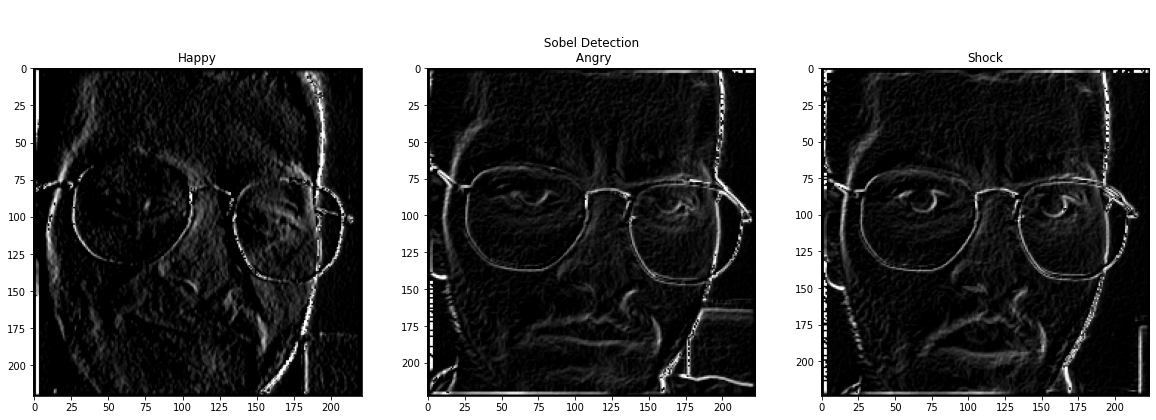

In [17]:
#Canny detection and sobel detection for all expression
def canny_expression(Gx, Gy):
  canny_happy = cv2.Canny(happy,Gx,Gy) #canny for happy expression
  canny_angry = cv2.Canny(angry,Gx,Gy)
  canny_shock = cv2.Canny(shock,Gx,Gy)
  plt.figure(figsize=[20,10])
  #for Canny
  plt.subplot(131);plt.imshow(canny_happy, cmap='gray');plt.title("Happy");
  plt.subplot(132);plt.imshow(canny_angry, cmap='gray');plt.title("Canny Detection \n Angry");
  plt.subplot(133);plt.imshow(canny_shock, cmap='gray');plt.title("Shock");

def sobel_expression(x, y):
  sobel_x_happy = cv2.Sobel(happy, cv2.CV_8U,x,y,ksize=3)
  sobel_y_happy = cv2.Sobel(happy, cv2.CV_8U,x,y,ksize=3)
  sobel_happy = sobel_x_happy + sobel_y_happy
  
  sobel_x_angry = cv2.Sobel(angry, cv2.CV_8U,x,y,ksize=3)
  sobel_y_angry = cv2.Sobel(angry, cv2.CV_8U,y,x,ksize=3)
  sobel_angry = sobel_x_angry + sobel_y_angry

  sobel_x_shock = cv2.Sobel(shock, cv2.CV_8U,x,y,ksize=3)
  sobel_y_shock = cv2.Sobel(shock, cv2.CV_8U,y,x,ksize=3)
  sobel_shock = sobel_x_shock + sobel_y_shock
  #for Sobel
  plt.figure(figsize=[20,10])
  plt.subplot(131);plt.imshow(sobel_happy, cmap='gray');plt.title("Happy");
  plt.subplot(132);plt.imshow(sobel_angry, cmap='gray');plt.title("\n \n Sobel Detection \n Angry");
  plt.subplot(133);plt.imshow(sobel_shock, cmap='gray');plt.title("Shock");

canny_expression(15, 70)
sobel_expression(1,0)

For cv2.Canny, G represents the first derivative in horizontal direction while Gy is the first derivative for vertical direction. For this function, the value for Gx is 15 while Gy is 70. We use this value because this value when added up will produce an edge gradient that results in a suitable output. Other values will start to erase the expression features that are present on the image

For Sobel edge detection, we need to use cv2.Sobel function with x and y parameters.
The way sobel edge detection works is by convolving I with a kernel x and y with odd size where for this picture, we use x equal to 1 and y equal to 0. The reason we use this value is because other values will remove the edges from the picture and thus make the picture blank.
The final result of the picture is the convolution of both horizontal changes,× and vertical changes, y.


**section B**

Firstly, we need to define the path to our picture and import it into our codes 


In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from PIL import Image
%matplotlib inline
drive.mount('/content/gdrive')
path = "/content"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [19]:
#for happy expression
img_happy_bgr = cv2.imread(path +"/Happy_Face.jpg",cv2.IMREAD_COLOR)
#for angry expression
img_angry_bgr = cv2.imread(path +"/Angry_Face.jpg",cv2.IMREAD_COLOR)
#for shock expression
img_shock_bgr = cv2.imread(path +"/Shock_Face.jpg",cv2.IMREAD_COLOR)




We will use cv2.IMREAD COLOR to read the pictures in BGR mode. Then we plot the pictures by using plt.imshow and the output .

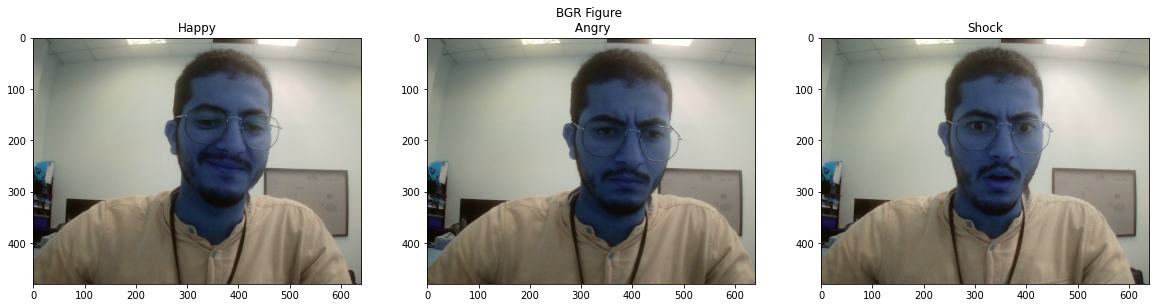

In [20]:
from posixpath import expanduser
def plot_expression_gray():
  plt.figure(figsize=[20,5])
  plt.subplot(131);plt.imshow(img_happy_bgr);plt.title("Happy");
  plt.subplot(132);plt.imshow(img_angry_bgr);plt.title("BGR Figure \n Angry");
  plt.subplot(133);plt.imshow(img_shock_bgr);plt.title("Shock");

plot_expression_gray ()


Notice that the colour of the pictures are distorted. This is due to matplotlib capability to initially read any images in RGB mode while our pictures are imported in BGR mode. This explains why the colour for the images are distorted.

In [51]:
def face_detection(filename):
  face_cascade = cv2.CascadeClassifier("/content/drive/MyDrive/MV/assignment1/haarcascade_frontalface_alt.xml")
  face = face_cascade.detectMultiScale(filename, 1.1 , 4)

  for(x, y, w, h) in face:
    cv2.rectangle(filename, (x, y), (x+w, y+h), (0,255,0), 3)
    face_region = filename[y:y + h, x:x + w]
    #blurring image
    blur = cv2.GaussianBlur(face_region, (85,85),0)

    filename[y:y+h, x:x+w] = blur

  #displayImage(img_happy_bgr)

Same like in assignment 1A, we will use Haar Cascade for the face detection and here, we will add cv2.GaussianBlur to blur the region inside the rectangle. The first value of 85 in the cv2.GaussianBlur represents kernel standard deviation along X-axis while the second value of 85 represents kernel standard deviation along Y-axis. By making this value higher, we will be able to make the picture even blurry. After that, we initialise the function for each different image and plot each image as 

In [52]:
face_detection(img_happy_bgr)
face_detection(img_angry_bgr)
face_detection(img_shock_bgr)

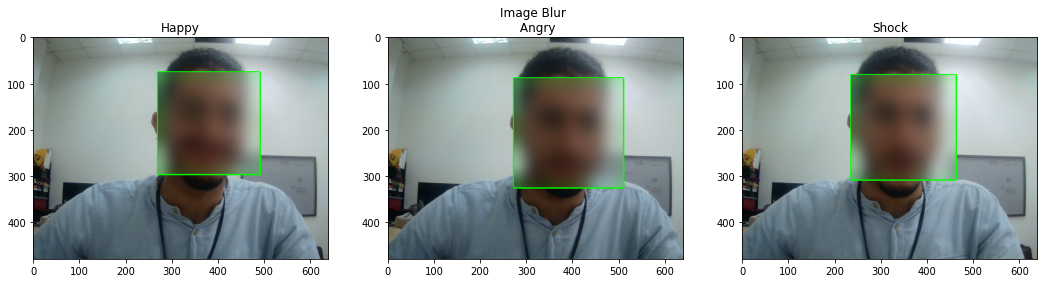

In [53]:
plt.figure(figsize=[18,5])
plt.subplot(131);plt.imshow(cv2.cvtColor(img_happy_bgr, cv2.COLOR_BGR2RGB));plt.title("Happy");
plt.subplot(132);plt.imshow(cv2.cvtColor(img_angry_bgr, cv2.COLOR_BGR2RGB));plt.title("Image Blur \n Angry");
plt.subplot(133);plt.imshow(cv2.cvtColor(img_shock_bgr, cv2.COLOR_BGR2RGB));plt.title("Shock");

Notice that we are able to have the colour for the picture in order. This is because as shown in figure 4.0, we use cv2.ctColor to convert the colour of the image from BGR to RGB.

**section C**

Firstly, we need to import the picture of the coin just like assignment 1A and 1B but for this assignment, we will import it in a grayscale picture.


In [31]:
#Importing libary 
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from PIL import Image
%matplotlib inline
drive.mount('/content/gdrive')
path = "/content/gdrive/MyDrive/MV/assignment1/Coin 50.jpg"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


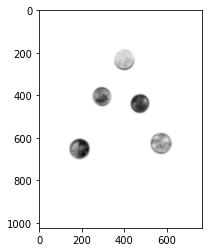

In [32]:
coin = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
coin_blur = cv2.GaussianBlur(coin, (19,19), 0)
coin_blur_canny = cv2.Canny(coin_blur, 90, 160, 5)

plt.imshow(coin_blur, cmap = 'gray')

 Importing pictures, Blurring and using Canny Edge Detection To import the picture in a grayscale mode, we can use cv2.IMREAD_GRAYSCALE or simply replace this with a value of 0. After that, we will need to blur the picture by using GaussianBlur and here, we want to just blur the picture slightly so we use a smaller value which is 19 . Then, we will get the result 
 

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Grayscale and blurred picture of the coins
Then we use canny edge detection with the parameter of x equal to 20 and y equal to 120 to produce the best edge detection for this picture. Note that the value of and y will vary depending on the pictures itself. We will need to vary the value until we find it suitable to our needs. For this assignment, using canny edge detection will result in the picture


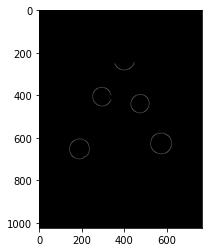

In [45]:
plt.imshow(coin_blur_canny, cmap = 'gray')

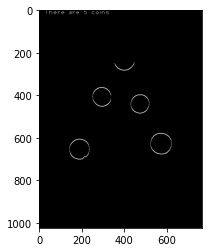

In [46]:

dilated = cv2.dilate(coin_blur_canny, (1,2), iterations = 2)

(cnt, _) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

text = "There are {} coins".format(len(cnt))
font = cv2.FONT_HERSHEY_PLAIN
cv2.putText(dilated, text, (25,20), font, 2, (255, 0, 0), 1, cv2.LINE_AA)

plt.imshow(dilated, cmap = 'gray')

 we use cv2.dilate function with an iterations of 2 to do erosion and dilation of the pictures. What this function does is that it increases the object area and we use it to accentuate features so that we can detect the coin. Then, we use the cv2. findContours0 function to find the region of the coin so that we can deduce the number of coins.
After we find the region by using cv2. findContours0, we can customize the output image by using cv2.putText function to put text in the picture. We can use many types of font however for this assignment, we used cv2.FONT_ HERSHEY_PLAIN where we are using a font named Hershey Plain. Then we position the text to be at (25,20) where 25 is the horizontal coordinate and 20 is the vertical coordinate. The number 2 in the cv2.putText) is the parameter for the size of the font. The output of the overall codes are 


Number of coins in the image: 5 coins


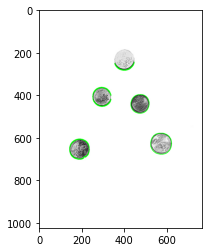

In [47]:
coin_rgb = cv2.cvtColor(coin, cv2.COLOR_GRAY2RGB)
cv2.drawContours(coin_rgb, cnt,-1, (0,255,0), 2)

plt.imshow(coin_rgb)
print("Number of coins in the image:", len(cnt), "coins")

By using cv2.drawContours0 in figure 6.0, we can draw the contours for the picture of the coins in RGB mode to make it look better. Then we can print the value of the coins detected in the picture 